#1: Even-Odd Vending Machine
Try writing an “even-odd vending machine,” which will take a number as
input and do two things:
1. Print whether the number is even or odd.
2. Display the number followed by the next 9 even or odd numbers.
If the input is 2, the program should print even and then print 2, 4, 6,
8, 10, 12, 14, 16, 18, 20. Similarly, if the input is 1, the program should
print odd and then print 1, 3, 5, 7, 9, 11, 13, 15, 17, 19.
www.it-ebooks.info
Working with Numbers 23
Your program should use the is_integer() method to display an error
message if the input is a number with significant digits beyond the decimal
point.

In [156]:
def even_odd(val):
    if val.is_integer():
        val_int = int(val)
        if val_int % 2 == 0:
            print('even')   
        else:
            print('odd')
        [print(i) for i in range(val_int,val_int+2*10,2)]
            #print(i)
    else:
        print('Invalid number input provided due to significant digits')

In [158]:
try:
    input_val = float(input('please input an integer: '))
except ValueError:
        print('You entered an invalid input, please try again')
else:
    even_odd(input_val)

please input an integer: 2
even
2
4
6
8
10
12
14
16
18
20


In Chapter 1, you learned how to find the roots of a quadratic equation,
such as 
x2 + 2x + 1 = 0. We can turn this equation into a function by writing
it as y = x2 + 2x + 1. For any value of x, the quadratic function produces some
value for y. For example, when x = 1, y = 4. Here’s a program that calculates
the value of y for six different values of x:
'''
Quadratic function calculator
'''
# Assume values of x
u x_values = [-1, 1, 2, 3, 4, 5]
v for x in x_values:
 # Calculate the value of the quadratic function
 y = x**2 + 2*x + 1
 print('x={0} y={1}'.format(x, y))
At u, we create a list with six different values for x. The for loop starting at v calculates the value of the function above for each of these values
and uses the label y to refer to the list of results. Next, we print the value of
x and the corresponding value of y. When you run the program, you should
see the following output:
x=-1 y=0
x=1 y=4
x=2 y=9
www.it-ebooks.info 
56 Chapter 2
x=3 y=16
x=4 y=25
x=5 y=36
Notice that the first line of the output is a root of the quadratic equation because it’s a value for x that makes the function equal to 0.
Your programming challenge is to enhance this program to create
a graph of the function. Try using at least 10 values for x instead of the 6
above. Calculate the corresponding y values using the function and then
create a graph using these two sets of values.
Once you’ve created the graph, spend some time analyzing how the
value of y varies with respect to x. Is the variation linear or nonlinear?

In [32]:
import matplotlib.pyplot as plt

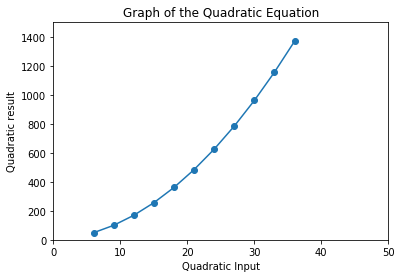

In [40]:
mult = 10
start_value = 6
step = 3
x_values = [x for x in range(start_value,start_value+mult*step+1,step)] #[-1, 1, 2, 3, 4, 5]
y_values = []
for x in x_values:
 # Calculate the value of the quadratic function
    y_values.append(x**2 + 2*x + 1)
    #print('x={0} y={1}'.format(x, y))
plt.plot(x_values,y_values,marker='o')
plt.axis(xmin=0,xmax=50,ymin=0,ymax=1500)
plt.xlabel('Quadratic Input')
plt.ylabel('Quadratic result')
plt.title('Graph of the Quadratic Equation')
plt.show();
#Non linear relationship due to the exponent in the equation
#as the input grows larger it will increase faster starting to see parabolic shape

3. Implement a statistics calculator that takes a list of numbers in the file
mydata.txt and then calculates and prints their mean, median, mode,
variance, and standard deviation using the functions we wrote earlier in
this chapter.

In [159]:
from collections import Counter

In [160]:
def open_file(file):
    with open(file) as f:
        ls = f.readlines()
        nums = [float(l) for l in ls]
        return nums

In [161]:
def calc_mean(numbers):
    return sum(numbers)/len(numbers)

In [171]:
def calc_median(numbers):
    numbers.sort()
    total = len(numbers)
    if total % 2==0:
        med_1 = int(total/2)-1
        med_2 = int(total/2 + 1)-1
        return calc_mean([med_1,med_2])
    else:
        return numbers[int((total+1)/2-1)]

In [163]:
def calc_mode(numbers):
    top_freq = Counter(numbers).most_common(1)[0][1]
    top_vals = []
    for num in Counter(numbers).most_common():
        if num[1]==top_freq:
             top_vals.append(num[0])
    return top_vals

In [164]:
def calc_variance(numbers):
    return sum([(val-calc_mean(numbers))**2 for val in numbers])/len(numbers)

In [165]:
def calc_std_dev(numbers):
    return calc_variance(numbers)**(1/2)

In [170]:
def stats_calc(file,manual:bool):
    if manual:
        data = file
    else:
        data = open_file(file)
    print('Mean: ',calc_mean(data))
    print('Median: ',calc_median(data))
    print('Mode: ',calc_mode(data))
    print('Variance:',calc_variance(data))
    print('Standard Deviation: ' ,calc_std_dev(data))

In [173]:
test = [2,4,65,76,43,20,17,64,32,4]
stats_calc(test,manual=True)

Mean:  32.7
Median:  4.5
Mode:  [4]
Variance: 700.2099999999999
Standard Deviation:  26.461481440010118


#4: Solving Single-Variable Inequalities
You’ve seen how to solve an equation using SymPy’s solve() function. But
SymPy is also capable of solving single-variable inequalities, such as x + 5 > 3
and sinx − 0.6 > 0. That is, SymPy can solve relations besides equality, like
>, <, and so on. For this challenge, create a function, isolve(), that will take
any inequality, solve it, and then return the solution.
First, let’s learn about the SymPy functions that will help you implement this. The inequality-solving functions are available as three separate
functions for polynomial, rational, and all other inequalities. We’ll need to
pick the right function to solve various inequalities, or we’ll get an error.
A polynomial is an algebraic expression consisting of a variable and
coefficients and involving only the operations of addition, subtraction,
and multiplication and only positive powers of the variable. An example
of a polynomial inequality is x2
 + 4 < 0.
To solve a polynomial inequality, use the solve_poly_inequality()
function:

In [184]:
from sympy import Poly, Symbol, solve_poly_inequality, solve_rational_inequalities
from sympy import solve, solve_univariate_inequality, sin, sympify
from sympy.core.sympify import SympifyError

In [179]:
#polynomial inequalities
def pol_inequal(inequality):
    x = Symbol('x')
    ineq_obj = inequality
    lhs = ineq_obj.lhs
    p = Poly(lhs, x)
    rel = ineq_obj.rel_op
    return solve_poly_inequality(p, rel)

In [180]:
#rational inequalities
def rat_inequal(inequality):
    x = Symbol('x')
    ineq_obj = inequality
    lhs = ineq_obj.lhs
    numer, denom = lhs.as_numer_denom()
    p1 = Poly(numer)
    p2 = Poly(denom)
    rel = ineq_obj.rel_op
    return solve_rational_inequalities([[((p1, p2), rel)]])

In [181]:
def univariate_inequal(inequality):
    x = Symbol('x')
    ineq_obj = inequality
    return solve_univariate_inequality(ineq_obj, x, relational=False)

In [182]:
def isolve(inequality):
    if inequality.is_polynomial():
        print(pol_inequal(inequality))
    elif inequality.is_rational_function():
        print(rat_inequal(inequality))
    else:
        print(univariate_inequal(inequality))

In [201]:
ineq = input('Please provide an inequality equation using the variable x: ')

if 'x' in ineq.lower() and ('<' in ineq or '>' in ineq) :
    isolve(sympify(ineq))
else:
    print('Please provide a valid inequality using the variable "x"')

Please provide an inequality equation using the variable x: x**2-x-4>0
Union(Interval.open(-oo, -sqrt(17)/2 + 1/2), Interval.open(1/2 + sqrt(17)/2, oo))


#2: Law of Large Numbers
We’ve referred to a die roll and coin toss as two examples of random events
that we can simulate using random numbers. We’ve used the term event
to refer to a certain number showing up on a die roll or to heads or tails
showing up on a coin toss, with each event having an associated probability
value. In probability, a random variable—usually denoted by X—describes
an event. For example, X = 1 describes the event of 1 appearing upon a die
roll, and P(X = 1) describes the associated probability. There are two kinds
of random variables: (1) discrete random variables, which take only integral
values and are the only kind of random variables we see in this chapter, and
(2) continuous random variables, which—as the name suggests—can take
any real value.
The expectation, E, of a discrete random variable is the equivalent of the
average or mean that we learned about in Chapter 3. The expectation can
be calculated as follows:
E = x1P(x1) + x2P(x2) + x3P(x3) + . . . + xnP(xn)
Thus, for a six-sided die, the expected value of a die roll can be calculated
like this:
>>> e = 1*(1/6) + 2*(1/6) + 3*(1/6) + 4*(1/6) + 5*(1/6) + 6*(1/6)
>>> e
3.5
www.it-ebooks.info 
144 Chapter 5
According to the law of large numbers, the average value of results over
multiple trials approaches the expected value as the number of trials
increases. Your challenge in this task is to verify this law when rolling a
six-sided die for the following number of trials: 100, 1000, 10000, 100000,
and 500000. Here’s an expected sample run of your complete program:
Expected value: 3.5
Trials: 100 Trial average 3.39
Trials: 1000 Trial average 3.576
Trials: 10000 Trial average 3.5054
Trials: 100000 Trial average 3.50201
Trials: 500000 Trial average 3.495568
p162/265 of pdf

In [115]:
import random

In [144]:
print('Expected value: 3.5')
trials = [100,1000,10000,100000,500000]
for trial in trials:
    sample = calc_mean([random.randint(1,6) for _ in range(0,trial)])
    #rolls = []
    #for _ in range(0,trial):
    #    rolls.append(random.randint(1,6))
    # load function from earlier cell
    print(f'Trials: {trial} Trial average {sample}')

Expected value: 3.5
Trials: 100 Trial average 3.36
Trials: 1000 Trial average 3.525
Trials: 10000 Trial average 3.5158
Trials: 100000 Trial average 3.50352
Trials: 500000 Trial average 3.500782


#2: Implement the Gradient Descent
The gradient descent method is used to find the minimum value of a function. Similar to the gradient ascent method, the gradient descent method is
www.it-ebooks.info
206 Chapter 7
an iterative method: we start with an initial value of the variable and gradually get closer to the variable value that corresponds to the minimum value
of the function. The step that gets us closer is the equation
xnew = xold − λ df/dx ,
where λ is the step size and
is the result of differentiating the function. Thus, the only difference
from the gradient ascent method is how we obtain the value of x_new from
x_old.
Your challenge is to implement a generic program using the gradient
descent algorithm to find the minimum value of a single-variable function
specified as input by the user. The program should also create a graph
of the function and show all the intermediate values it found before finding the minimum. (You may want to refer to Figure 7-5 on page 193.)

In [145]:
from sympy import Derivative, Symbol, sympify, solve
import matplotlib.pyplot as plt

In [207]:
def grad_descent(x0, f1x, x,vals):
 # Check if f1x=0 has a solution
    if not solve(f1x):
         print('Cannot continue, solution for {0}=0 does not exist'.format(f1x))
    else:
        epsilon = 1e-6
        step_size = 1e-4
        x_old = x0
        x_new = x_old - step_size*f1x.subs({x:x_old}).evalf()
        vals.append(x_new)
        while abs(x_old - x_new) > epsilon:
            x_old = x_new
            x_new = x_old - step_size*f1x.subs({x:x_old}).evalf()
            vals.append(x_new)
        return x_new,vals

Enter a function in one variable: 4 * x**2 - x - 4
Enter the variable to differentiate with respect to: x
Enter the initial value of the variable: 4
x: 0.126248926654750
Minimum value: -4.06249376072884


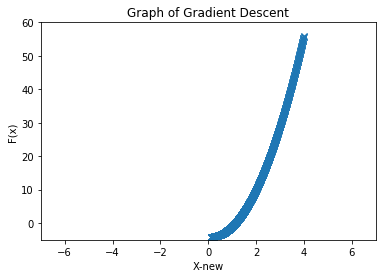

In [218]:
f = input('Enter a function in one variable: ')
var = input('Enter the variable to differentiate with respect to: ')
var0 = float(input('Enter the initial value of the variable: '))
try:
    f = sympify(f)

except SympifyError:
    print('Invalid function entered')

else:
    var = Symbol(var)
    values = []
    d = Derivative(f, var).doit()
    var_min,x_coord = grad_descent(var0, d, var,values)
    if var_min:
        print(f'{var.name}: {var_min}')
        print(f'Minimum value: {f.subs({var:var_min})}')
        y_vals = [f.subs('x',i) for i in x_coord]
        plt.plot(x_coord,y_vals,marker='x')
        plt.xticks()
        plt.axis(xmin=-7,xmax=7,ymin=-5,ymax=60)
        plt.xlabel('X-new')
        plt.ylabel('F(x)')
        plt.title('Graph of Gradient Descent')
        plt.show();
#chose a simpler function with a clearer global minimum as I'm having issues modifying the function to reach beyond
# local minima. Reading online that smoothing or Schocastic descent can sometimes help with these issues

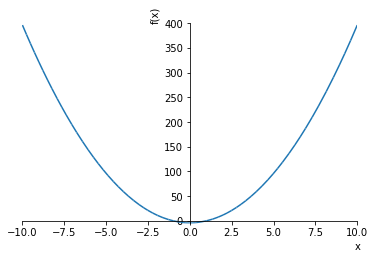

In [198]:
from sympy.plotting import plot
from sympy import Symbol
x = Symbol('x')
plot(4*x**2 - 4)